In [100]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift




In [101]:
iamge_path = "Image.jpg"

"""Functions to preproccess the image, they do not need to be defined because they are a part of PIL, but I included them here."""
#load the image
def load_image(image_path):
    image = Image.open(image_path)
    
    # Get file size in bytes
    file_size = os.path.getsize(image_path)  # File size on disk in bytes
    
    print(f"Image loaded with dimensions: {image.size} (Width x Height).")
    print(f"File size on disk: {file_size / (1024 ** 2):.6f} MB.")
    return image


#turn the image into an array for processing
def image_to_array(image):
    image_array = np.array(image)
    return image_array

#normalize image in range 0-1 (can help if we want to use fourier transform)
def normalize_image(array):
    normalized_array = array / 255.0
    return normalized_array

#plot image
def visualize_image(array, title="Image"):
    plt.imshow(array)
    plt.title(title)
    plt.axis('off')
    plt.show()


    # Load image
image = load_image(iamge_path)

    # Convert to array
array = image_to_array(image)

    # Normalize the image
normalized_array = normalize_image(array)

print(normalized_array)
print(normalized_array.shape)




Image loaded with dimensions: (6960, 4640) (Width x Height).
File size on disk: 18.314173 MB.
[[[0.18823529 0.16862745 0.15686275]
  [0.16862745 0.12941176 0.1254902 ]
  [0.15686275 0.10980392 0.10980392]
  ...
  [0.31764706 0.35294118 0.41960784]
  [0.30588235 0.34117647 0.40784314]
  [0.29019608 0.3254902  0.39215686]]

 [[0.18823529 0.15294118 0.15686275]
  [0.15294118 0.11372549 0.11764706]
  [0.14509804 0.09803922 0.10588235]
  ...
  [0.31372549 0.34901961 0.41568627]
  [0.29803922 0.33333333 0.4       ]
  [0.29019608 0.3254902  0.39215686]]

 [[0.1372549  0.10196078 0.11372549]
  [0.14117647 0.09411765 0.10980392]
  [0.14117647 0.08235294 0.10196078]
  ...
  [0.30980392 0.34509804 0.41176471]
  [0.30196078 0.3372549  0.40392157]
  [0.31372549 0.34901961 0.41568627]]

 ...

 [[0.0627451  0.06666667 0.04313725]
  [0.05490196 0.05882353 0.03529412]
  [0.05098039 0.05490196 0.02352941]
  ...
  [0.09019608 0.07843137 0.04313725]
  [0.08235294 0.07058824 0.03529412]
  [0.07843137 0.066

In [102]:
#Now let's apply the Fourier Transform to the image
def apply_fourier_transform(rgb_array):
    # Split the RGB array into channels
    red_channel = rgb_array[:, :, 0]
    green_channel = rgb_array[:, :, 1]
    blue_channel = rgb_array[:, :, 2]
    
    # Compute the 2D Fourier Transform and shift the zero-frequency component to the center
    red_fft = fftshift(fft2(red_channel))
    green_fft = fftshift(fft2(green_channel))
    blue_fft = fftshift(fft2(blue_channel))
    
    return red_fft, green_fft, blue_fft





def visualize_fourier_transform_2d_important(red_fft, green_fft, blue_fft, zoom_size=50):
    """
    Visualize the important portions of the Fourier Transform for each channel by isolating
    and plotting slices near the center of the frequency spectrum.
    
    Args:
        red_fft: Fourier Transform of the red channel.
        green_fft: Fourier Transform of the green channel.
        blue_fft: Fourier Transform of the blue channel.
        zoom_size: The size of the zoom window around the center (default: 50).
    """
    def plot_fft_channel(fft_channel, color, channel_name):
        center_row = fft_channel.shape[0] // 2
        center_col = fft_channel.shape[1] // 2
        
        # Zoom into the region of interest
        zoomed_fft = fft_channel[
            center_row - zoom_size:center_row + zoom_size,
            center_col - zoom_size:center_col + zoom_size
        ]

        # Extract horizontal and vertical slices
        horizontal_slice = np.abs(zoomed_fft[zoom_size, :])  # Horizontal axis
        vertical_slice = np.abs(zoomed_fft[:, zoom_size])    # Vertical axis

        # Plot horizontal and vertical slices
        plt.figure(figsize=(10, 5))
        
        # Horizontal slice
        plt.subplot(1, 2, 1)
        plt.plot(horizontal_slice, color=color)
        plt.title(f"{channel_name} Channel - Horizontal Slice (Zoomed)")
        plt.xlabel("Frequency (horizontal)")
        plt.ylabel("Magnitude")
        
        # Vertical slice
        plt.subplot(1, 2, 2)
        plt.plot(vertical_slice, color=color)
        plt.title(f"{channel_name} Channel - Vertical Slice (Zoomed)")
        plt.xlabel("Frequency (vertical)")
        plt.ylabel("Magnitude")
        
        plt.tight_layout()
        plt.show()

    # Visualize Red Channel
    plot_fft_channel(red_fft, "red", "Red")
    
    # Visualize Green Channel
    plot_fft_channel(green_fft, "green", "Green")
    
    # Visualize Blue Channel
    plot_fft_channel(blue_fft, "blue", "Blue")





def visualize_fourier_transform_overlay(red_fft, green_fft, blue_fft, zoom_size=50):
    """
    Visualize and overlay the important portions of the Fourier Transform slices
    for the Red, Green, and Blue channels.
    
    Args:
        red_fft: Fourier Transform of the red channel.
        green_fft: Fourier Transform of the green channel.
        blue_fft: Fourier Transform of the blue channel.
        zoom_size: The size of the zoom window around the center (default: 50).
    """
    def extract_slices(fft_channel):
        center_row = fft_channel.shape[0] // 2
        center_col = fft_channel.shape[1] // 2
        
        # Zoom into the region of interest
        zoomed_fft = fft_channel[
            center_row - zoom_size:center_row + zoom_size,
            center_col - zoom_size:center_col + zoom_size
        ]

        # Extract horizontal and vertical slices
        horizontal_slice = np.log1p(np.abs(zoomed_fft[zoom_size, :]))  # Horizontal axis
        vertical_slice = np.log1p(np.abs(zoomed_fft[:, zoom_size]))    # Vertical axis

        return horizontal_slice, vertical_slice

    # Extract slices for each channel
    red_h, red_v = extract_slices(red_fft)
    green_h, green_v = extract_slices(green_fft)
    blue_h, blue_v = extract_slices(blue_fft)

    # Plot horizontal slices overlayed
    plt.figure(figsize=(10, 5))
    plt.plot(red_h, color="red", label="Red Channel")
    plt.plot(green_h, color="green", label="Green Channel")
    plt.plot(blue_h, color="blue", label="Blue Channel")
    plt.title("Overlayed Horizontal Slices (Zoomed)")
    plt.xlabel("Frequency (horizontal)")
    plt.ylabel("Log Magnitude")
    plt.legend()
    plt.show()

    # Plot vertical slices overlayed
    plt.figure(figsize=(10, 5))
    plt.plot(red_v, color="red", label="Red Channel")
    plt.plot(green_v, color="green", label="Green Channel")
    plt.plot(blue_v, color="blue", label="Blue Channel")
    plt.title("Overlayed Vertical Slices (Zoomed)")
    plt.xlabel("Frequency (vertical)")
    plt.ylabel("Log Magnitude")
    plt.legend()
    plt.show()


In [103]:
red_fft, green_fft, blue_fft  = apply_fourier_transform(normalized_array)

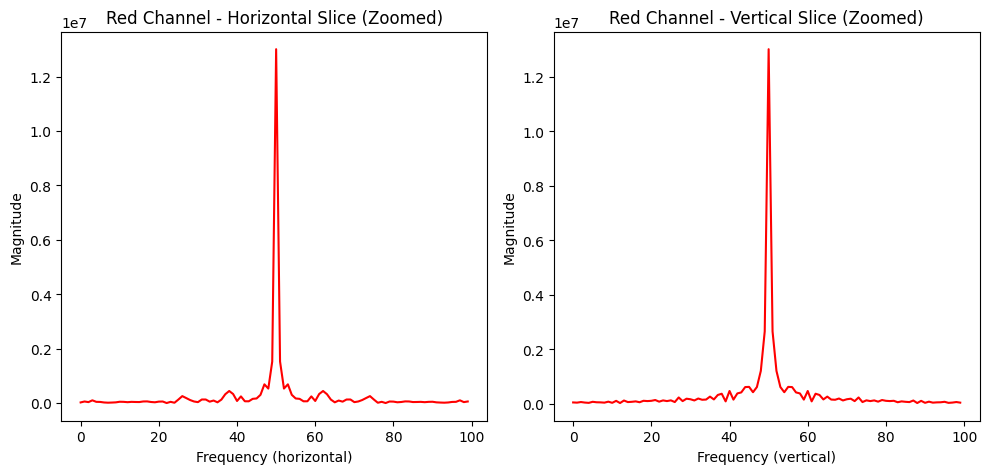

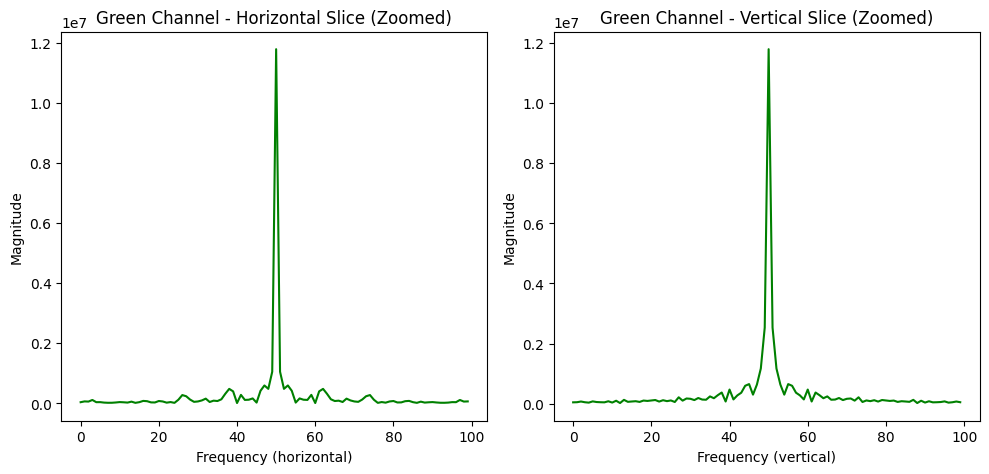

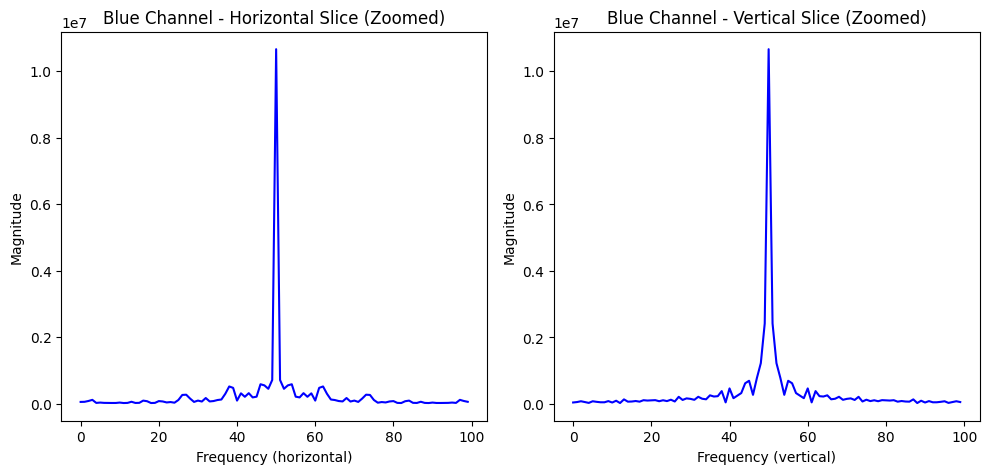

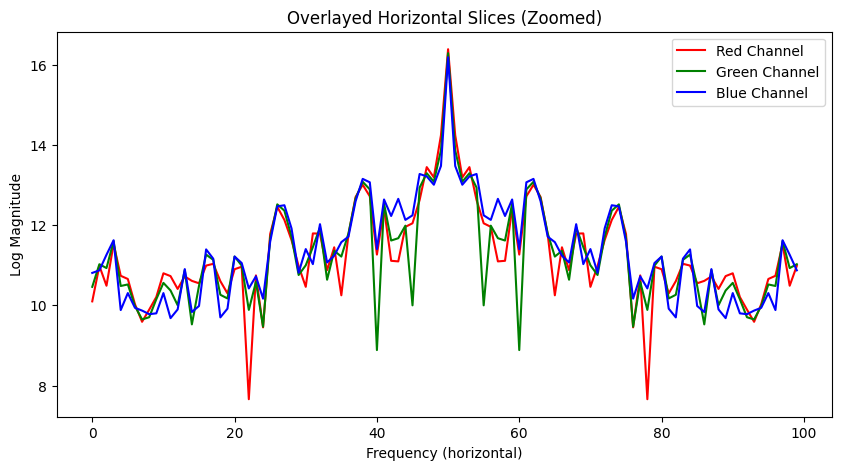

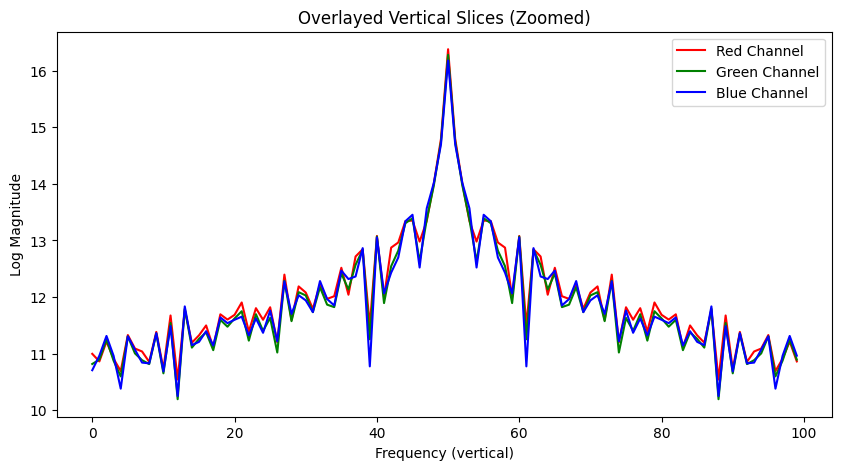

In [104]:
visualize_fourier_transform_2d_important(red_fft, green_fft, blue_fft)
visualize_fourier_transform_overlay(red_fft, green_fft, blue_fft)

In [128]:
def compress_fft(red_fft, green_fft, blue_fft, threshold=0.05):
    """
    Compress the Fourier Transforms of the RGB channels by thresholding 
    and visualize the resulting frequency domain.
    
    Args:
        red_fft, green_fft, blue_fft: Fourier Transforms of the RGB channels.
        threshold: Percentage of the highest-magnitude frequencies to retain.
    
    Returns:
        red_compressed, green_compressed, blue_compressed: Compressed FFTs for RGB channels.
    """
    def apply_threshold(fft_channel, threshold):
        # Compute magnitude of the Fourier coefficients
        magnitude = np.abs(fft_channel)
        max_magnitude = np.max(magnitude)

        # Create a mask to retain only significant frequencies
        mask = magnitude > (threshold * max_magnitude)

        # Apply the mask to the Fourier Transform
        fft_channel_compressed = fft_channel * mask
        return fft_channel_compressed, mask

    # Apply thresholding to each channel
    red_compressed, red_mask = apply_threshold(red_fft, threshold)
    green_compressed, green_mask = apply_threshold(green_fft, threshold)
    blue_compressed, blue_mask = apply_threshold(blue_fft, threshold)

    return red_compressed, green_compressed, blue_compressed


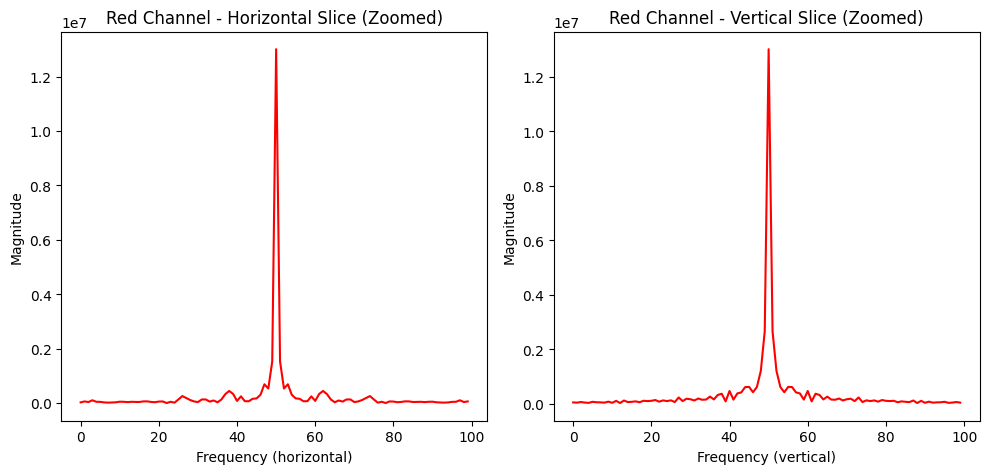

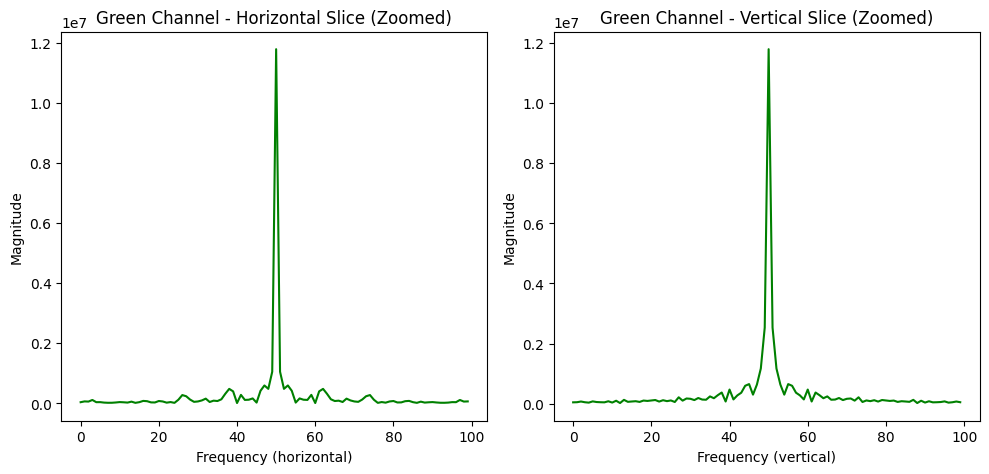

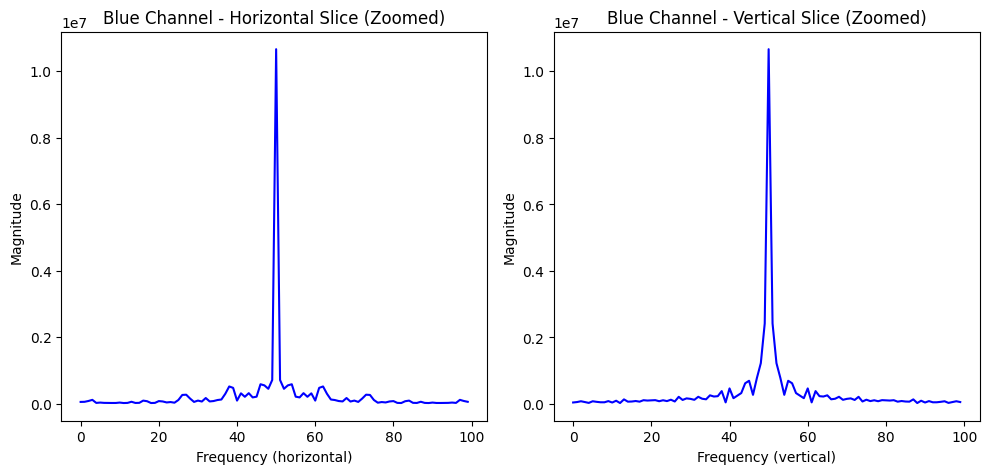

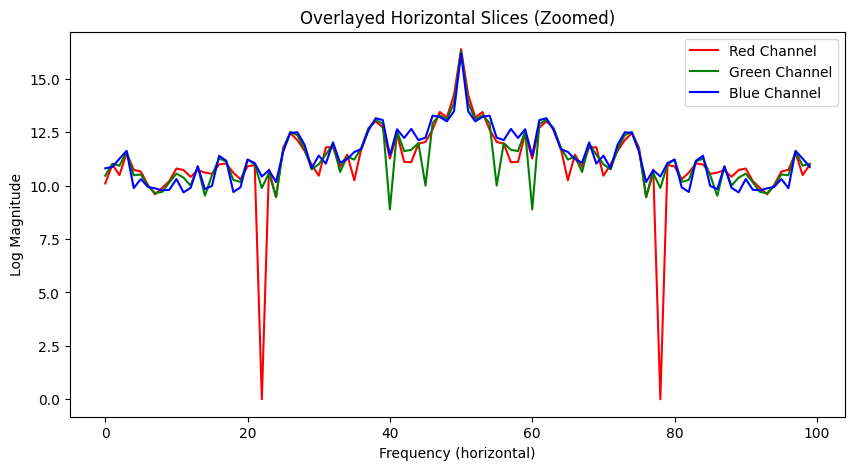

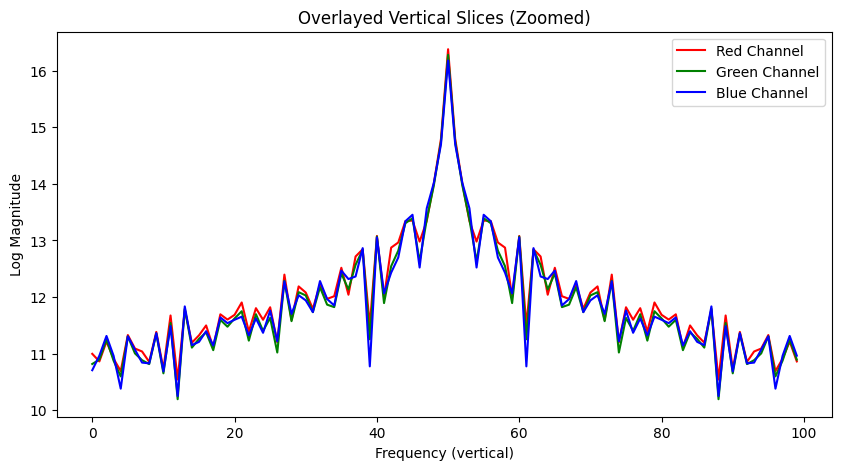

In [136]:
red_compressed, green_compressed, blue_compressed = compress_fft(red_fft, green_fft, blue_fft, threshold=0.0005)
visualize_fourier_transform_2d_important(red_compressed, green_compressed, blue_compressed)
visualize_fourier_transform_overlay(red_compressed, green_compressed, blue_compressed)

In [137]:
def reconstruct_image_from_fft(red_fft, green_fft, blue_fft):
    """
    Reconstruct the image from the compressed Fourier Transforms.
    
    Args:
        red_fft, green_fft, blue_fft: Compressed Fourier Transforms of the RGB channels.
    
    Returns:
        Reconstructed image as a NumPy array.
    """
    # Reconstruct each channel from the inverse Fourier Transform
    red_reconstructed = np.abs(ifft2(ifftshift(red_fft)))
    green_reconstructed = np.abs(ifft2(ifftshift(green_fft)))
    blue_reconstructed = np.abs(ifft2(ifftshift(blue_fft)))

    # Normalize each channel to the range [0, 255]
    red_normalized = 255 * (red_reconstructed - red_reconstructed.min()) / (red_reconstructed.max() - red_reconstructed.min())
    green_normalized = 255 * (green_reconstructed - green_reconstructed.min()) / (green_reconstructed.max() - green_reconstructed.min())
    blue_normalized = 255 * (blue_reconstructed - blue_reconstructed.min()) / (blue_reconstructed.max() - blue_reconstructed.min())

    # Combine the channels into an RGB image
    reconstructed_image = np.stack([
        red_normalized.astype(np.uint8),
        green_normalized.astype(np.uint8),
        blue_normalized.astype(np.uint8)
    ], axis=2)
    
    return reconstructed_image



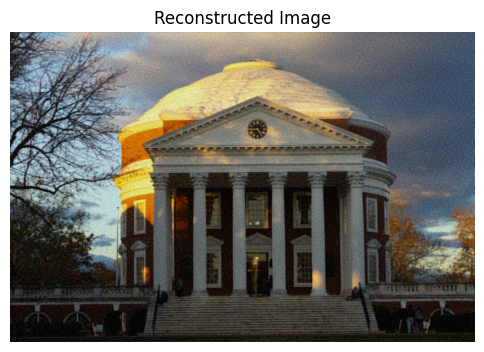

Reconstructed Image Shape: (4640, 6960, 3)
File Size of 'reconstructed_image.jpg': 2058.51 KB


In [138]:
reconstructed_image = reconstruct_image_from_fft(red_compressed, green_compressed, blue_compressed)

# Visualize the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

# Print the shape of the image
print("Reconstructed Image Shape:", reconstructed_image.shape)

# Save the reconstructed image
output_file = "reconstructed_image.jpg"
Image.fromarray(reconstructed_image).save(output_file)

# Calculate and print the disk space size
file_size = os.path.getsize(output_file)
print(f"File Size of '{output_file}': {file_size / 1024:.2f} KB")

In [109]:

"""there are predefined functions for denormalize_image, array_to_image, save_image, etc, but i added them above so we can debug if we need to"""
def save_image(image, save_path):
    image.save(save_path)
    #print(f"Image saved to {save_path}")


def denormalize_image(normalized_array):
    # Check the range of the input array
    if np.min(normalized_array) < 0:
        # Scale [-1, 1] to [0, 255]
        denormalized_array = ((normalized_array + 1) * 127.5).astype(np.uint8)
    else:
        # Scale [0, 1] to [0, 255]
        denormalized_array = (normalized_array * 255).astype(np.uint8)

    return denormalized_array

def array_to_image(array):
    #2D = GrayScale
    if array.ndim == 2:
        return Image.fromarray(array, mode="L")  # Grayscale
    #3D = RGB
    elif array.ndim == 3 and array.shape[2] == 3:
        return Image.fromarray(array, mode="RGB")  # RGB



# Function to recreate the image
def recreate_image(normalized_array, save_path=None):
    # Denormalize the array
    denormalized_array = denormalize_image(normalized_array)

    # Convert back to an image
    recreated_image = array_to_image(denormalized_array)

    # Save the image if a save path is provided
    if save_path:
        save_image(recreated_image, save_path)

    # Visualize the recreated image (optional)
    #visualize_image(denormalized_array, "Recreated Image")

    return recreated_image

processed_image = preprocess_image("Image.jpg")

#to visualize image either uncomment the visualize_image function or look through the save_path
recreated_image = recreate_image(processed_image, save_path="recreated_image.jpg")


Image loaded with dimensions: (6960, 4640) (Width x Height).
File size on disk: 18.314173 MB.
